Before Preprocessing
0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

After Preprocessing
0    AT_USER URL - Awww, that's a bummer. You shoul...
1    is upset that he can't update his Facebook by ...
2    AT_USER I dived many times for the ball. Manag...
3      my whole body feels itchy and like its on fire 
4    AT_USER no, it's not behaving at all. i'm mad....
Name: text, dtype: object

Before encoding sentiments
0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

After encoding sentiments
0    NEGATIVE
1    NEGATIVE
2    NEGATIVE
3    NEGATIVE
4    NEGATIVE
Name: sentiment, dtype: object

['POSITIVE' 'POSITIVE' 'POSITIVE' ... 'NEGATIVE' 'NEGATIVE' 'NEGATIVE']
[1 1 1 ... 0 0 0]


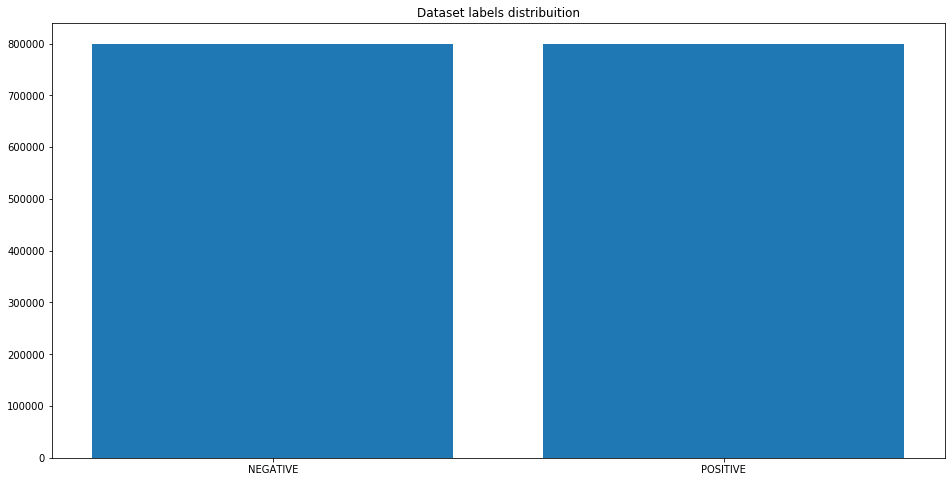

In [11]:

import numpy as np
import pandas as pd
import re


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from collections import Counter
import itertools
import matplotlib.pyplot as plt
%matplotlib inline



decode_map = {0: "NEGATIVE", 1: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]



def import_tweets(filename, header = None):
	#import data from csv file via pandas library

	tweet_dataset = pd.read_csv(filename, encoding = 'ISO-8859-1', header = header)
  
  
	#the column names are based on sentiment140 dataset provided on kaggle
	tweet_dataset.columns = ['sentiment','id','date','flag','user','text']
	#delete 3 columns: flags,id,user, as they are not required for analysis
	for i in ['flag','id','user','date']: del tweet_dataset[i] # or tweet_dataset = tweet_dataset.drop(["id","user","date","user"], axis = 1)
	#in sentiment140 dataset, positive = 4, negative = 0; So we change positive to 1
	tweet_dataset.sentiment = tweet_dataset.sentiment.replace(4,1)
	return tweet_dataset

def preprocess_tweet(tweet):
    #Preprocess the text in a single tweet
    #arguments: tweet = a single tweet in form of string 
    #convert the tweet to lower case
    tweet.lower()
    #convert all urls to sting "URL"
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #convert all @username to "AT_USER"
    tweet = re.sub('@[^\s]+','AT_USER', tweet)
    #correct all multiple white spaces to a single white space
    tweet = re.sub('[\s]+', ' ', tweet)
    #convert "#topic" to just "topic"
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    return tweet


def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)



#apply the preprocess function for all the tweets in the dataset
tweet_dataset = import_tweets("/Users/saifalipatel/Desktop/training.1600000.processed.noemoticon.csv")
TRAIN_SIZE = 0.8
print("Before Preprocessing")
print(tweet_dataset.text.head())
print()
print("After Preprocessing")
tweet_dataset['text'] = tweet_dataset['text'].apply(preprocess_tweet)
print(tweet_dataset.text.head())

print()
print("Before encoding sentiments")
print(tweet_dataset.sentiment.head())

tweet_dataset.sentiment=tweet_dataset.sentiment.apply(lambda x: decode_sentiment(x))
target_cnt = Counter(tweet_dataset.sentiment)

print()
print("After encoding sentiments")
print(tweet_dataset.sentiment.head())

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")
print()

df_train, df_test = train_test_split(tweet_dataset, test_size=1-TRAIN_SIZE, random_state=42)

train_data = np.array(df_train.text)
train_label = np.array(df_train.sentiment)




tfv=TfidfVectorizer(sublinear_tf=True, stop_words = "english") # we need to give proper stopwords list for better performance
features=tfv.fit_transform(train_data)


print(train_label)

encoder = preprocessing.LabelEncoder()
encoder.fit(train_label.tolist())
train_label = encoder.transform(train_label.tolist())


print(train_label)



test_data = np.array(df_test.text)
test_label = np.array(df_test.sentiment)
test_label = encoder.transform(test_label.tolist())
features_test=tfv.transform(test_data)


[1 0 1 ... 1 0 0]

['POSITIVE' 'NEGATIVE' 'POSITIVE' ... 'POSITIVE' 'NEGATIVE' 'NEGATIVE']

MultinomialNB
Accuracy: 0.763396875

Classification Report:
              precision    recall  f1-score   support

    Negative       0.76      0.77      0.76    159494
    Positive       0.77      0.76      0.76    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000


Mean Absoulte error
0.236603125

Mean Squared error
0.236603125

Area Under Curve
0.7634044607040821



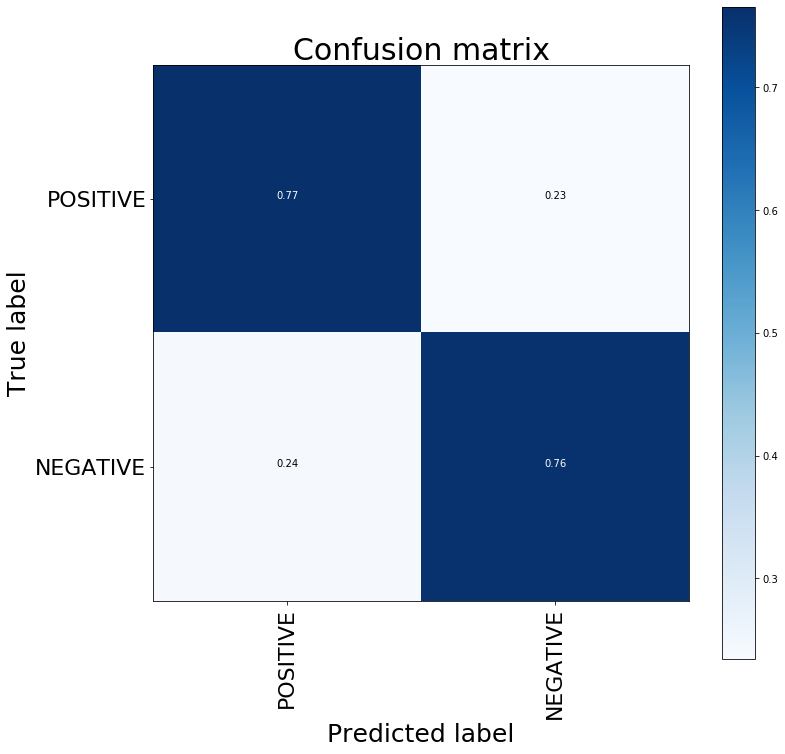

In [12]:


model = MultinomialNB()
model.fit(features,train_label)


test_predict=model.predict(features_test)

print(test_predict)
print()

test_predict_labels=encoder.inverse_transform(test_predict)
print(test_predict_labels)
print()

print("MultinomialNB")
print("Accuracy:",metrics.accuracy_score(test_label, test_predict))
print()
print("Classification Report:")
print(metrics.classification_report(test_label, test_predict,target_names=["Negative","Positive"]))
print()
print("Mean Absoulte error")
print(metrics.mean_absolute_error(test_label, test_predict))
print()
      
print("Mean Squared error")
print(metrics.mean_squared_error(test_label, test_predict))
print()

print("Area Under Curve")
print(metrics.roc_auc_score(test_label, test_predict))
print()


    
cnf_matrix = metrics.confusion_matrix(list(df_test.sentiment), test_predict_labels)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.sentiment.unique(), title="Confusion matrix")
plt.show()













Logistic Regression
Accuracy: 0.779546875

Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.76      0.77    159494
    Positive       0.77      0.80      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000


Mean Absoulte error
0.220453125

Mean Squared error
0.220453125

Area Under Curve
0.7794835047983841



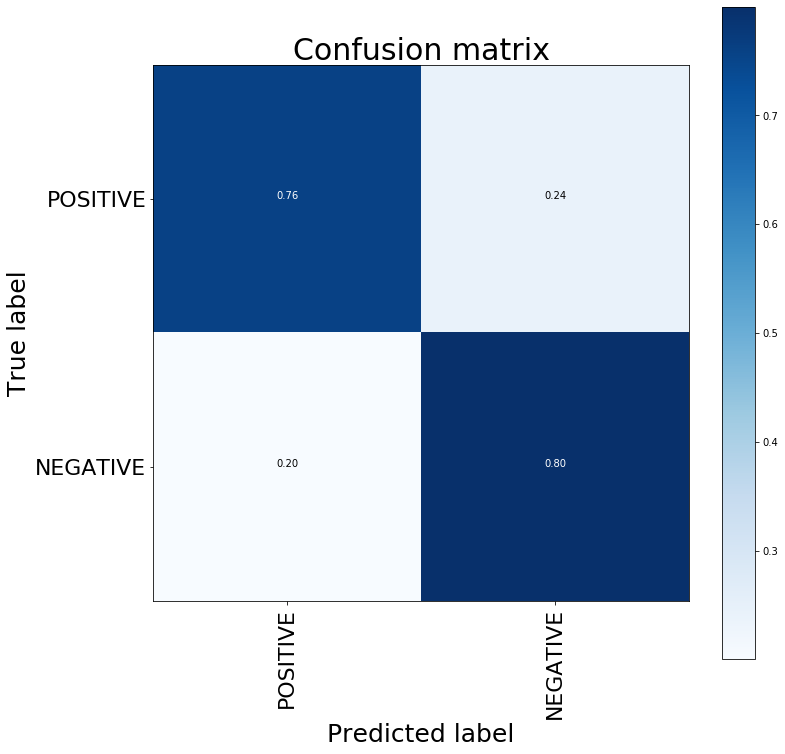

In [13]:

print("Logistic Regression")
model = LogisticRegression(C=1.,max_iter=400)
#fit model to data
model.fit(features,train_label)
test_predict=model.predict(features_test)
test_predict_labels=encoder.inverse_transform(test_predict)


print("Accuracy:",metrics.accuracy_score(test_label, test_predict))
print()
print("Classification Report:")
print(metrics.classification_report(test_label, test_predict,target_names=["Negative","Positive"]))
print()

print("Mean Absoulte error")
print(metrics.mean_absolute_error(test_label, test_predict))
print()
      
print("Mean Squared error")
print(metrics.mean_squared_error(test_label, test_predict))
print()

print("Area Under Curve")
print(metrics.roc_auc_score(test_label, test_predict))
print()


cnf_matrix = metrics.confusion_matrix(list(df_test.sentiment), test_predict_labels)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.sentiment.unique(), title="Confusion matrix")
plt.show()





LinearSVC
Accuracy: 0.772378125

Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.75      0.77    159494
    Positive       0.76      0.79      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000


Mean Absoulte error
0.227621875

Mean Squared error
0.227621875

Area Under Curve
0.7723200791696793



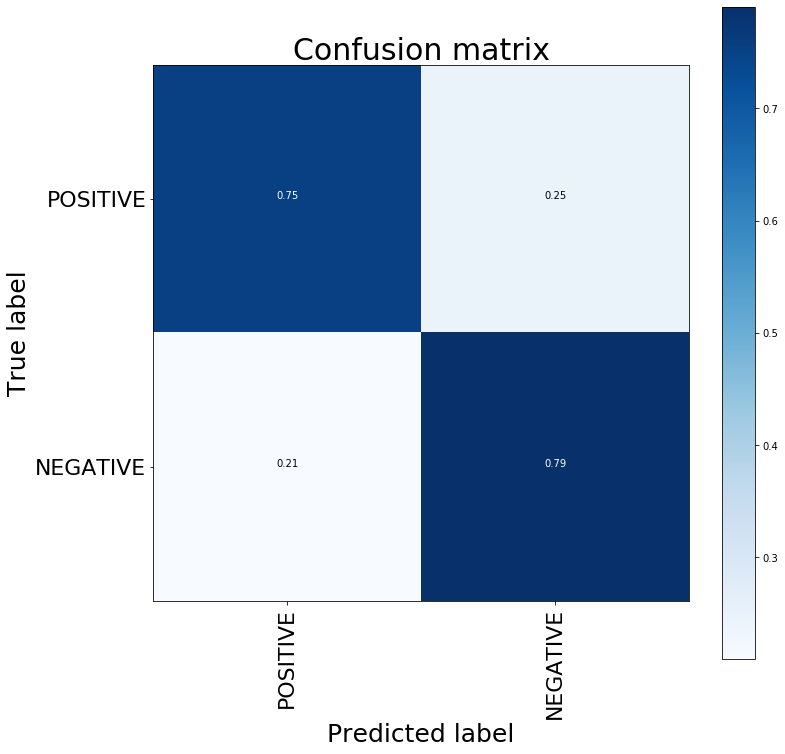

In [14]:

print("LinearSVC")
model = LinearSVC()
#fit model to data
model.fit(features,train_label)
test_predict=model.predict(features_test)


test_predict_labels=encoder.inverse_transform(test_predict)


print("Accuracy:",metrics.accuracy_score(test_label, test_predict))
print()
print("Classification Report:")
print(metrics.classification_report(test_label, test_predict,target_names=["Negative","Positive"]))
print()

print("Mean Absoulte error")
print(metrics.mean_absolute_error(test_label, test_predict))
print()
      
print("Mean Squared error")
print(metrics.mean_squared_error(test_label, test_predict))
print()

print("Area Under Curve")
print(metrics.roc_auc_score(test_label, test_predict))
print()

    
cnf_matrix = metrics.confusion_matrix(list(df_test.sentiment), test_predict_labels)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.sentiment.unique(), title="Confusion matrix")
plt.show()


Let us tune the model by making changes to the feature extraction method
MultinomialNB
Accuracy: 0.778965625

Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.78      0.78    159494
    Positive       0.78      0.78      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000


Mean Absoulte error
0.221034375

Mean Squared error
0.221034375

Area Under Curve
0.7789560317885373



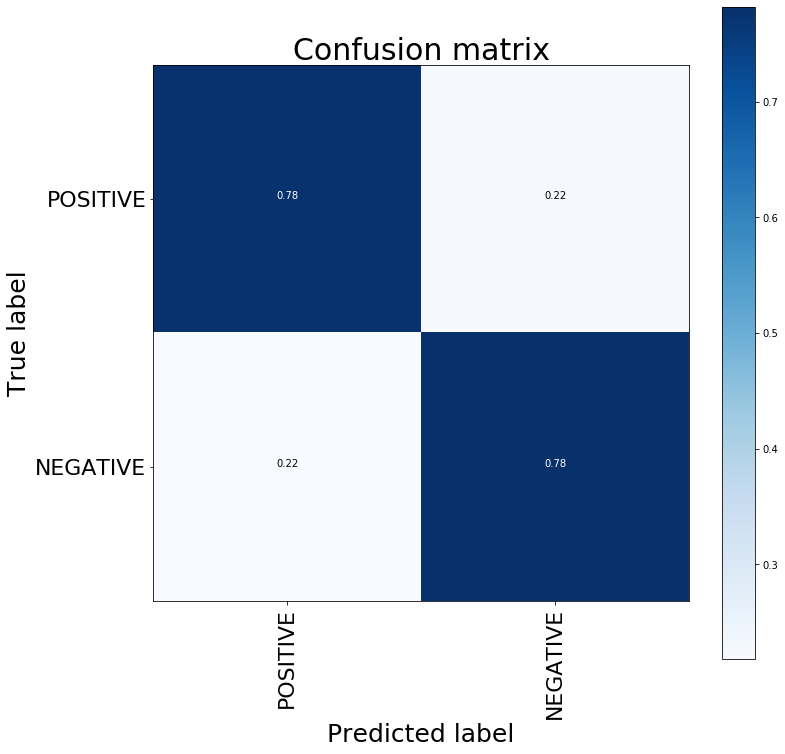

In [17]:
print("Let us tune the model by making changes to the feature extraction method")

train_label = np.array(df_train.sentiment)
tfv=TfidfVectorizer(sublinear_tf=True, stop_words = "english",ngram_range=(1,2))

# we need to give proper stopwords list for better performance
features=tfv.fit_transform(train_data)

encoder = preprocessing.LabelEncoder()
encoder.fit(train_label.tolist())
train_label = encoder.transform(train_label.tolist())



test_data = np.array(df_test.text)
test_label = np.array(df_test.sentiment)
test_label = encoder.transform(test_label.tolist())


features_test=tfv.transform(test_data)

print("MultinomialNB")
model = MultinomialNB()
#fit model to data
model.fit(features,train_label)


test_predict=model.predict(features_test)


test_predict_labels=encoder.inverse_transform(test_predict)

print("Accuracy:",metrics.accuracy_score(test_label, test_predict))
print()
print("Classification Report:")
print(metrics.classification_report(test_label, test_predict,target_names=["Negative","Positive"]))
print()

print("Mean Absoulte error")
print(metrics.mean_absolute_error(test_label, test_predict))
print()
      
print("Mean Squared error")
print(metrics.mean_squared_error(test_label, test_predict))
print()

print("Area Under Curve")
print(metrics.roc_auc_score(test_label, test_predict))
print()

cnf_matrix = metrics.confusion_matrix(list(df_test.sentiment), test_predict_labels)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.sentiment.unique(), title="Confusion matrix")
plt.show()




Logistic Regression
Accuracy: 0.791228125

Classification Report:
              precision    recall  f1-score   support

    Negative       0.80      0.78      0.79    159494
    Positive       0.78      0.81      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000


Mean Absoulte error
0.208771875

Mean Squared error
0.208771875

Area Under Curve
0.7911828585271236



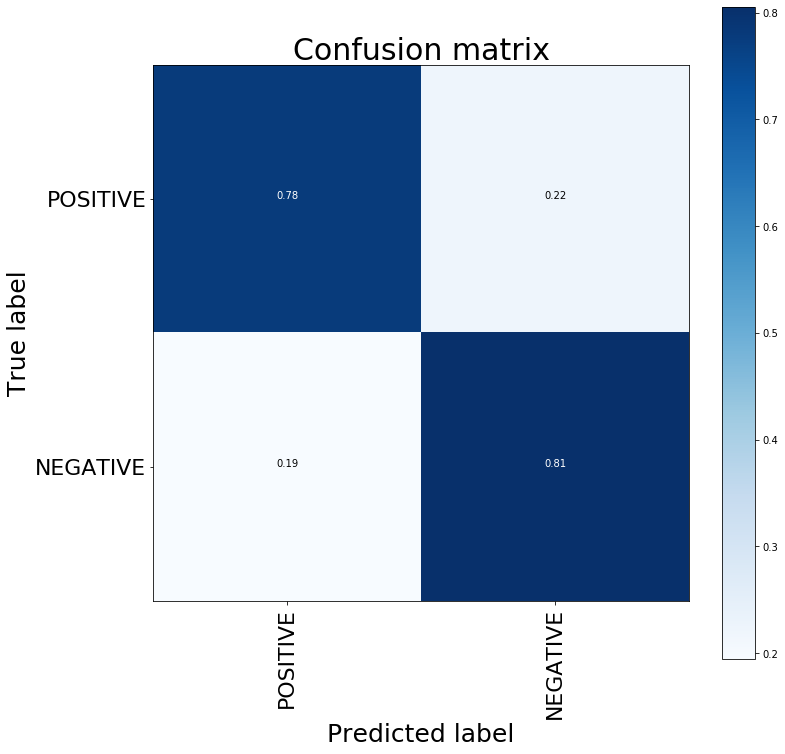

In [18]:
features_test=tfv.transform(test_data)
print("Logistic Regression")
model = LogisticRegression(C=1.,max_iter=400)
#fit model to data
model.fit(features,train_label)
test_predict=model.predict(features_test)
test_predict_labels=encoder.inverse_transform(test_predict)


print("Accuracy:",metrics.accuracy_score(test_label, test_predict))
print()
print("Classification Report:")
print(metrics.classification_report(test_label, test_predict,target_names=["Negative","Positive"]))
print()

print("Mean Absoulte error")
print(metrics.mean_absolute_error(test_label, test_predict))
print()
      
print("Mean Squared error")
print(metrics.mean_squared_error(test_label, test_predict))
print()

print("Area Under Curve")
print(metrics.roc_auc_score(test_label, test_predict))
print()


cnf_matrix = metrics.confusion_matrix(list(df_test.sentiment), test_predict_labels)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.sentiment.unique(), title="Confusion matrix")
plt.show()

LinearSVC
Accuracy: 0.784040625

Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.77      0.78    159494
    Positive       0.78      0.79      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000


Mean Absoulte error
0.215959375

Mean Squared error
0.215959375

Area Under Curve
0.7840116329766587



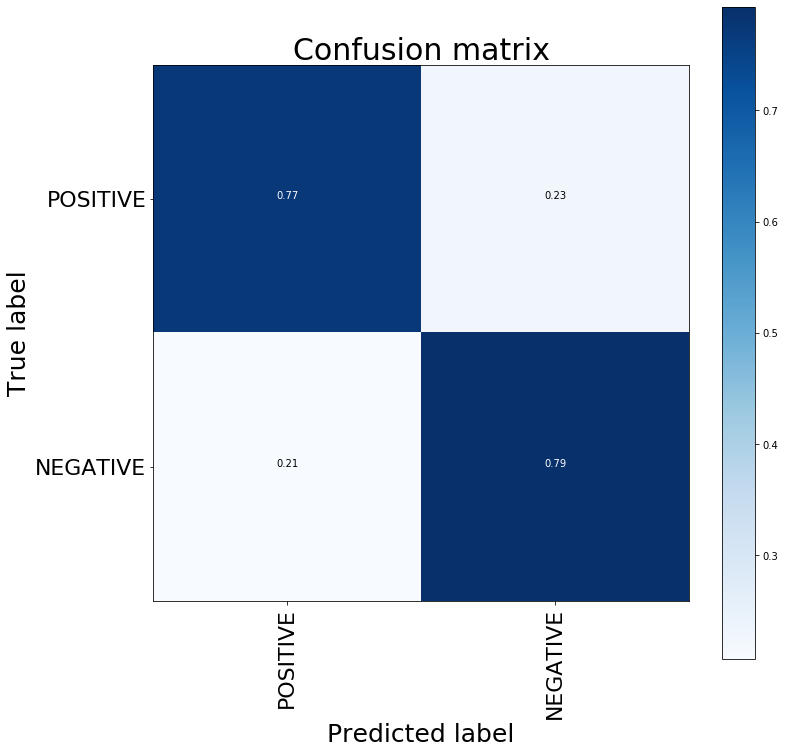

In [19]:
features_test=tfv.transform(test_data)
print("LinearSVC")
model = LinearSVC()
#fit model to data
model.fit(features,train_label)
test_predict=model.predict(features_test)
test_predict_labels=encoder.inverse_transform(test_predict)


print("Accuracy:",metrics.accuracy_score(test_label, test_predict))
print()
print("Classification Report:")
print(metrics.classification_report(test_label, test_predict,target_names=["Negative","Positive"]))
print()

print("Mean Absoulte error")
print(metrics.mean_absolute_error(test_label, test_predict))
print()
      
print("Mean Squared error")
print(metrics.mean_squared_error(test_label, test_predict))
print()

print("Area Under Curve")
print(metrics.roc_auc_score(test_label, test_predict))
print()


cnf_matrix = metrics.confusion_matrix(list(df_test.sentiment), test_predict_labels)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.sentiment.unique(), title="Confusion matrix")
plt.show()

In [20]:
print("Testing using one tweet")
test_text="I like icecream"
features_test=tfv.transform([test_text])
test_predict=model.predict(features_test)
test_predict_labels=encoder.inverse_transform(test_predict)
print(test_predict_labels)

Testing using one tweet
['POSITIVE']
